# Clustering

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

Clustering review INDOENSIA

In [2]:
# Load data
data_indo = pd.read_csv("netflix_playstore_reviews.csv")

# Ambil kolom review
teks_indo = data_indo['content'].dropna()

# TF-IDF Vectorizer (Bahasa Indonesia)
tfidf_indo = TfidfVectorizer(
    stop_words=None,
    max_features=1000
)

X_indo = tfidf_indo.fit_transform(teks_indo)

# K-Means
kmeans_indo = KMeans(n_clusters=3, random_state=42)
cluster_indo = kmeans_indo.fit_predict(X_indo)

# Simpan hasil cluster
data_indo = data_indo.loc[teks_indo.index]
data_indo['cluster'] = cluster_indo

print(data_indo[['content', 'cluster']].head())

                                             content  cluster
0  masa baru daftar akun langsung di suruh bayar ...        1
1                                 kualitas nya bagus        2
2                                          memuaskan        0
3                     makasih terbayar nostalgia aku        0
4  aplikasinya bagussih tap111111 lebih ba9us kal...        1


Clustering review USA

In [3]:
# Load data
data_usa = pd.read_csv("netflix_playstore_reviews_usa.csv")

# Ambil kolom review
teks_usa = data_usa['content'].dropna()

# TF-IDF Vectorizer (Bahasa Inggris)
tfidf_usa = TfidfVectorizer(
    stop_words='english',
    max_features=1000
)

X_usa = tfidf_usa.fit_transform(teks_usa)

# K-Means
kmeans_usa = KMeans(n_clusters=3, random_state=42)
cluster_usa = kmeans_usa.fit_predict(X_usa)

# Simpan hasil cluster
data_usa = data_usa.loc[teks_usa.index]
data_usa['cluster'] = cluster_usa

print(data_usa[['content', 'cluster']].head())


                                             content  cluster
0  i feel like it's not even worth to subscribe a...        0
1  adflix i love watching ads its my favourite pa...        1
2                   One And only Premium Ott channel        0
3                                               best        0
4                                              a la.        0


Topic Modeling Review Indonesia 

In [4]:
# Load data
data_indo = pd.read_csv("netflix_playstore_reviews.csv")

teks_indo = data_indo['content'].dropna()

# Count Vectorizer
cv_indo = CountVectorizer(
    max_features=1000
)

X_indo = cv_indo.fit_transform(teks_indo)

# LDA Model
lda_indo = LatentDirichletAllocation(
    n_components=3,
    random_state=42
)

lda_indo.fit(X_indo)

# Tampilkan kata utama tiap topik
feature_names = cv_indo.get_feature_names_out()

for idx, topic in enumerate(lda_indo.components_):
    print(f"Topik {idx+1}:")
    print([feature_names[i] for i in topic.argsort()[-10:]])


Topik 1:
['akun', 'gak', 'ini', 'mau', 'udah', 'aja', 'masuk', 'saya', 'login', 'bisa']
Topik 2:
['netflix', 'yg', 'dan', 'nonton', 'nya', 'ada', 'saya', 'yang', 'di', 'film']
Topik 3:
['banget', 'tapi', 'ga', 'ini', 'saya', 'netflix', 'aplikasi', 'bagus', 'bisa', 'di']


Topic Modeling Review USA

In [5]:
# Load data
data_usa = pd.read_csv("netflix_playstore_reviews_usa.csv")

teks_usa = data_usa['content'].dropna()

# Count Vectorizer
cv_usa = CountVectorizer(
    stop_words='english',
    max_features=1000
)

X_usa = cv_usa.fit_transform(teks_usa)

# LDA Model
lda_usa = LatentDirichletAllocation(
    n_components=3,
    random_state=42
)

lda_usa.fit(X_usa)

# Tampilkan kata utama tiap topik
feature_names = cv_usa.get_feature_names_out()

for idx, topic in enumerate(lda_usa.components_):
    print(f"Topik {idx+1}:")
    print([feature_names[i] for i in topic.argsort()[-10:]])


Topik 1:
['movie', 'phone', 'just', 'content', 'great', 'don', 'best', 'watch', 'app', 'netflix']
Topik 2:
['watch', 'shows', 'time', 'money', 'account', 'movies', 'love', 'netflix', 'app', 'good']
Topik 3:
['content', 'movie', 'app', 'netflix', 'like', 'watch', 'nice', 'series', 'shows', 'movies']


Elbow review Netflix Indoensia

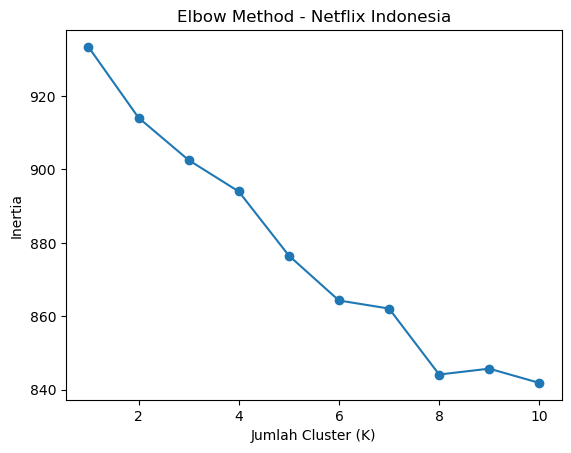

In [6]:
# Load data
data_indo = pd.read_csv("netflix_playstore_reviews.csv")

# Ambil teks review
teks_indo = data_indo['content'].dropna()

# TF-IDF
tfidf_indo = TfidfVectorizer(max_features=1000)
X_indo = tfidf_indo.fit_transform(teks_indo)

# Hitung inertia untuk berbagai K
inertia_indo = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_indo)
    inertia_indo.append(kmeans.inertia_)

# GRAFIK ELBOW INDOENSIA
plt.figure()
plt.plot(K, inertia_indo, marker='o')
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method - Netflix Indonesia")
plt.show()


Elbow review Netflix USA

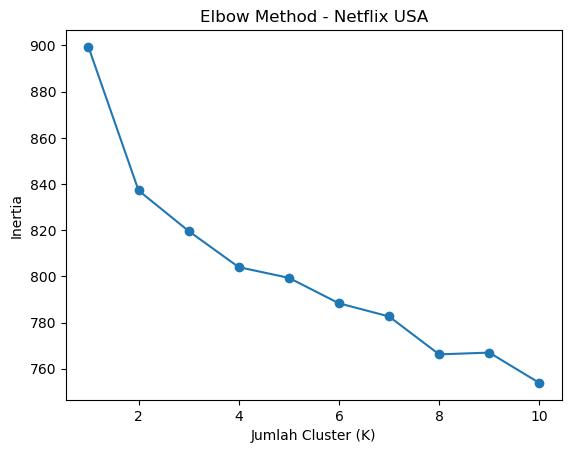

In [7]:
# Load data
data_usa = pd.read_csv("netflix_playstore_reviews_usa.csv")

# Ambil teks review
teks_usa = data_usa['content'].dropna()

# TF-IDF (Bahasa Inggris)
tfidf_usa = TfidfVectorizer(stop_words='english', max_features=1000)
X_usa = tfidf_usa.fit_transform(teks_usa)

# Hitung inertia untuk berbagai K
inertia_usa = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_usa)
    inertia_usa.append(kmeans.inertia_)


# GRAFIK ELBOW USA
plt.figure()
plt.plot(K, inertia_usa, marker='o')
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method - Netflix USA")
plt.show()